## Overview

This lecture illustrates two of the most important theorems of probability and statistics: The
law of large numbers (LLN) and the central limit theorem (CLT).

These beautiful theorems lie behind many of the most fundamental results in econometrics and quantitative economic modeling.

The lecture is based around simulations that show the LLN and CLT in action.

We also demonstrate how the LLN and CLT break down when the assumptions they are based on do not hold.

In addition, we examine several useful extensions of the classical theorems, such as

- The delta method, for smooth functions of random variables, and  
- the multivariate case.  


Some of these extensions are presented as exercises.

We’ll need the following imports:

In [ ]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (11, 5)  #set default figure size
import random
import numpy as np
from scipy.stats import t, beta, lognorm, expon, gamma, uniform
from scipy.stats import gaussian_kde, poisson, binom, norm, chi2
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.collections import PolyCollection
from scipy.linalg import inv, sqrtm

## Relationships

The CLT refines the LLN.

The LLN gives conditions under which sample moments converge to population moments as sample size increases.

The CLT provides information about the rate at which sample moments converge to population moments as sample size increases.


<a id='lln-mr'></a>

## LLN


<a id='index-4'></a>
We begin with the law of large numbers, which tells us when sample averages
will converge to their population means.


<a id='lln-ksl'></a>

### The Classical LLN

The classical law of large numbers concerns independent and
identically distributed (IID) random variables.

Here is the strongest version of the classical LLN, known as *Kolmogorov’s strong law*.

Let $ X_1, \ldots, X_n $ be independent and identically
distributed scalar random variables, with common distribution $ F $.

When it exists, let $ \mu $ denote the common mean of this sample:

$$
\mu := \mathbb E X = \int x F(dx)
$$

In addition, let

$$
\bar X_n := \frac{1}{n} \sum_{i=1}^n X_i
$$

Kolmogorov’s strong law states that, if $ \mathbb E |X| $ is finite, then


<a id='equation-lln-as'></a>
$$
\mathbb P \left\{ \bar X_n \to \mu \text{ as } n \to \infty \right\} = 1 \tag{9.1}
$$

What does this last expression mean?

Let’s think about it from a simulation perspective, imagining for a moment that
our computer can generate perfect random samples (which of course [it can’t](https://en.wikipedia.org/wiki/Pseudorandom_number_generator)).

Let’s also imagine that we can generate infinite sequences so that the
statement $ \bar X_n \to \mu $ can be evaluated.

In this setting, [(9.1)](#equation-lln-as) should be interpreted as meaning that the
probability of the computer producing a sequence where $ \bar X_n \to \mu $ fails to occur
is zero.

### Proof


<a id='index-5'></a>
The proof of Kolmogorov’s strong law is nontrivial – see, for example, theorem 8.3.5 of [[Dudley, 2002](https://python.quantecon.org/zreferences.html#id161)].

On the other hand, we can prove a weaker version of the LLN very easily and
still get most of the intuition.

The version we prove is as follows: If $ X_1, \ldots, X_n $ is IID with $ \mathbb E X_i^2 < \infty $,
then, for any $ \epsilon > 0 $, we have


<a id='equation-lln-ip'></a>
$$
\mathbb P \left\{ | \bar X_n - \mu | \geq \epsilon \right\} \to 0
\quad \text{as} \quad
n \to \infty \tag{9.2}
$$

(This version is weaker because we claim only [convergence in probability](https://en.wikipedia.org/wiki/Convergence_of_random_variables#Convergence_in_probability) rather than [almost sure convergence](https://en.wikipedia.org/wiki/Convergence_of_random_variables#Almost_sure_convergence), and assume a finite second moment)

To see that this is so, fix $ \epsilon > 0 $, and let $ \sigma^2 $ be the variance of each $ X_i $.

Recall the [Chebyshev inequality](https://en.wikipedia.org/wiki/Chebyshev%27s_inequality), which tells us that


<a id='equation-lln-cheb'></a>
$$
\mathbb P \left\{ | \bar X_n - \mu | \geq \epsilon \right\}
\leq \frac{\mathbb E [ (\bar X_n - \mu)^2]}{\epsilon^2} \tag{9.3}
$$

Now observe that

$$
\begin{aligned}
    \mathbb E [ (\bar X_n - \mu)^2 ]
    & = \mathbb E \left\{ \left[
    \frac{1}{n} \sum_{i=1}^n (X_i - \mu)
    \right]^2 \right\}
    \\
    & = \frac{1}{n^2} \sum_{i=1}^n \sum_{j=1}^n \mathbb E (X_i - \mu)(X_j - \mu) \nonumber
    \\
    & = \frac{1}{n^2} \sum_{i=1}^n \mathbb E (X_i - \mu)^2 \nonumber
    \\
    & = \frac{\sigma^2}{n} \nonumber
\end{aligned}
$$

Here the crucial step is at the third equality, which follows from
independence.

Independence means that if $ i \not= j $, then the covariance term $ \mathbb E (X_i - \mu)(X_j - \mu) $ drops out.

As a result, $ n^2 - n $ terms vanish, leading us to a final expression that goes to zero in $ n $.

Combining our last result with [(9.3)](#equation-lln-cheb), we come to the estimate


<a id='equation-lln-cheb2'></a>
$$
\mathbb P \left\{ | \bar X_n - \mu | \geq \epsilon \right\}
\leq \frac{\sigma^2}{n \epsilon^2} \tag{9.4}
$$

The claim in [(9.2)](#equation-lln-ip) is now clear.

Of course, if the sequence $ X_1, \ldots, X_n $ is correlated, then the cross-product terms
$ \mathbb E (X_i - \mu)(X_j - \mu) $ are not necessarily zero.

While this doesn’t mean that the same line of argument is impossible, it does mean
that if we want a similar result then the covariances should be “almost zero”
for “most” of these terms.

In a long sequence, this would be true if, for example, $ \mathbb E (X_i - \mu)(X_j - \mu) $
approached zero when the difference between $ i $ and $ j $ became
large.

In other words, the LLN can still work if the sequence $ X_1, \ldots, X_n $ has a kind of “asymptotic independence”, in the sense that correlation falls to zero as variables become further apart in the sequence.

This idea is very important in time series analysis, and we’ll come across it again soon enough.

### Illustration


<a id='index-6'></a>
Let’s now illustrate the classical IID law of large numbers using simulation.

In particular, we aim to generate some sequences of IID random variables and plot the evolution
of $ \bar X_n $ as $ n $ increases.

Below is a figure that does just this (as usual, you can click on it to expand it).

It shows IID observations from three different distributions and plots $ \bar X_n $ against $ n $ in each case.

The dots represent the underlying observations $ X_i $ for $ i = 1, \ldots, 100 $.

In each of the three cases, convergence of $ \bar X_n $ to $ \mu $ occurs as predicted

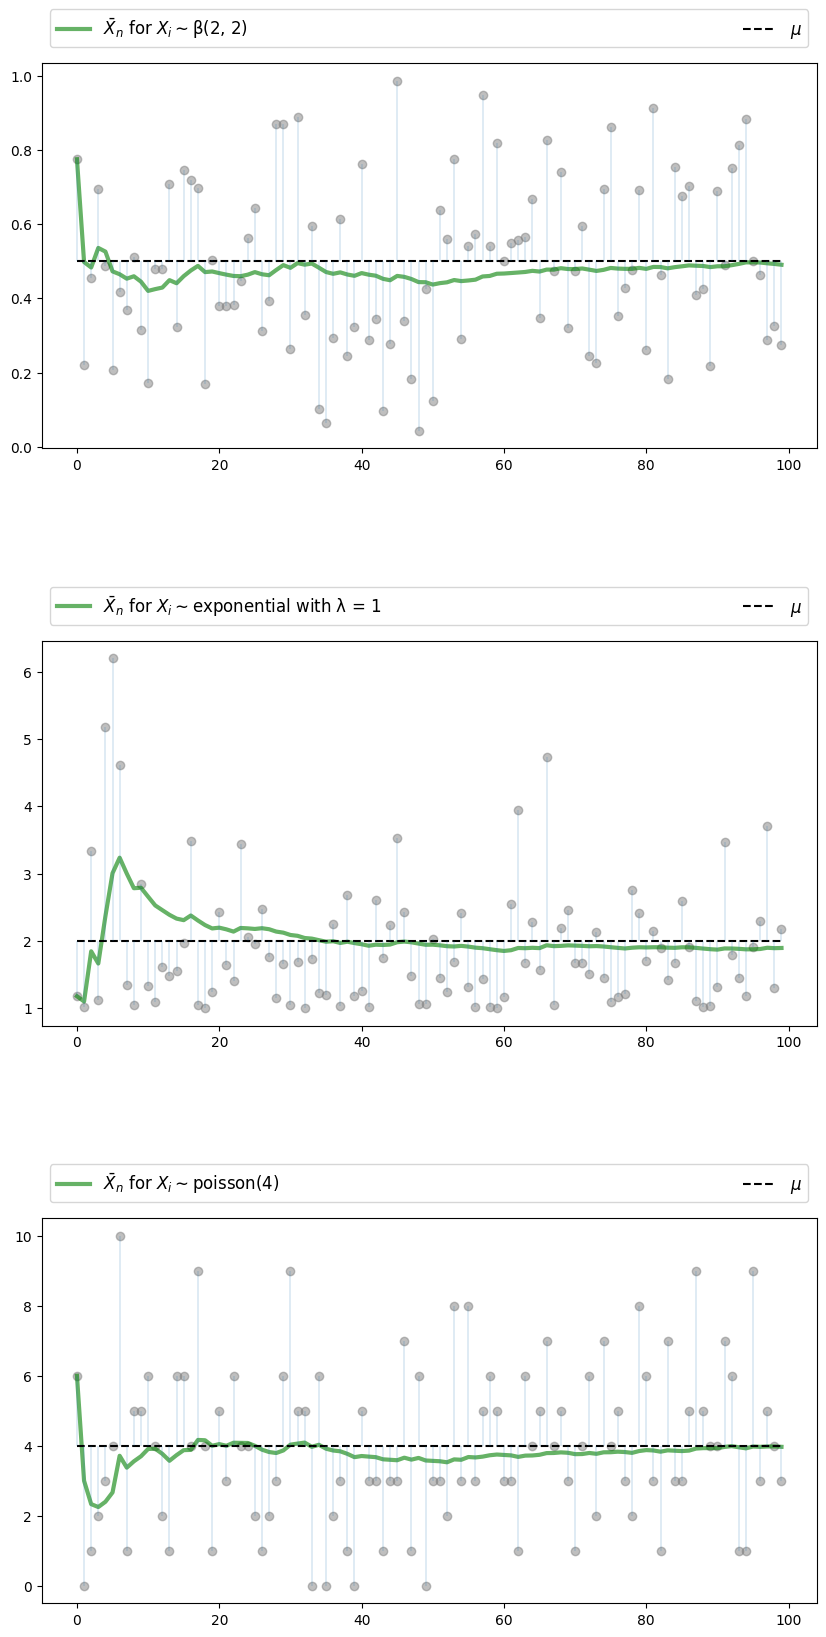

In [ ]:
n = 100

# Arbitrary collection of distributions
distributions = {"student's t with 10 degrees of freedom": t(10),
                 "β(2, 2)": beta(2, 2),
                 "lognormal LN(0, 1/2)": lognorm(0.5),
                 "γ(5, 1/2)": gamma(5, scale=2),
                 "poisson(4)": poisson(4),
                 "exponential with λ = 1": expon(1)}

# Create a figure and some axes
num_plots = 3
fig, axes = plt.subplots(num_plots, 1, figsize=(10, 20))

# Set some plotting parameters to improve layout
bbox = (0., 1.02, 1., .102)
legend_args = {'ncol': 2,
               'bbox_to_anchor': bbox,
               'loc': 3,
               'mode': 'expand'}
plt.subplots_adjust(hspace=0.5)

for ax in axes:
    # Choose a randomly selected distribution
    name = random.choice(list(distributions.keys()))
    distribution = distributions.pop(name)

    # Generate n draws from the distribution
    data = distribution.rvs(n)

    # Compute sample mean at each n
    sample_mean = np.empty(n)
    for i in range(n):
        sample_mean[i] = np.mean(data[:i+1])

    # Plot
    ax.plot(list(range(n)), data, 'o', color='grey', alpha=0.5)
    axlabel = '$\\bar{X}_n$ for $X_i \sim$' + name
    ax.plot(list(range(n)), sample_mean, 'g-', lw=3, alpha=0.6, label=axlabel)
    m = distribution.mean()
    ax.plot(list(range(n)), [m] * n, 'k--', lw=1.5, label='$\mu$')
    ax.vlines(list(range(n)), m, data, lw=0.2)
    ax.legend(**legend_args, fontsize=12)

plt.show()

The three distributions are chosen at random from a selection stored in the dictionary `distributions`.

## CLT


<a id='index-7'></a>
Next, we turn to the central limit theorem, which tells us about the distribution of the deviation between sample averages and population means.

### Statement of the Theorem

The central limit theorem is one of the most remarkable results in all of mathematics.

In the classical IID setting, it tells us the following:


<a id='statement-clt'></a>
If the sequence $ X_1, \ldots, X_n $ is IID, with common mean
$ \mu $ and common variance $ \sigma^2 \in (0, \infty) $, then


<a id='equation-lln-clt'></a>
$$
\sqrt{n} ( \bar X_n - \mu ) \stackrel { d } {\to} N(0, \sigma^2)
\quad \text{as} \quad
n \to \infty \tag{9.5}
$$

Here $ \stackrel { d } {\to} N(0, \sigma^2) $ indicates [convergence in distribution](https://en.wikipedia.org/wiki/Convergence_of_random_variables#Convergence_in_distribution) to a centered (i.e, zero mean) normal with standard deviation $ \sigma $.

### Intuition


<a id='index-8'></a>
The striking implication of the CLT is that for **any** distribution with
finite second moment, the simple operation of adding independent
copies **always** leads to a Gaussian curve.

A relatively simple proof of the central limit theorem can be obtained by
working with characteristic functions (see, e.g., theorem 9.5.6 of [[Dudley, 2002](https://python.quantecon.org/zreferences.html#id161)]).

The proof is elegant but almost anticlimactic, and it provides surprisingly little intuition.

In fact, all of the proofs of the CLT that we know are similar in this respect.

Why does adding independent copies produce a bell-shaped distribution?

Part of the answer can be obtained by investigating the addition of independent Bernoulli
random variables.

In particular, let $ X_i $ be binary, with $ \mathbb P\{X_i = 0\} = \mathbb P\{X_i =
1 \} = 0.5 $, and let $ X_1, \ldots, X_n $ be independent.

Think of $ X_i = 1 $ as a “success”, so that $ Y_n = \sum_{i=1}^n X_i $ is the number of successes in $ n $ trials.

The next figure plots the probability mass function of $ Y_n $ for $ n = 1, 2, 4, 8 $

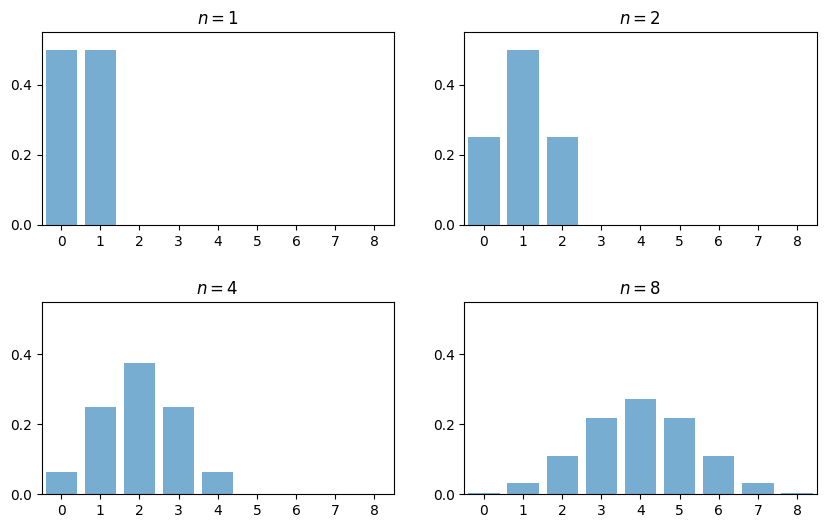

In [ ]:
fig, axes = plt.subplots(2, 2, figsize=(10, 6))
plt.subplots_adjust(hspace=0.4)
axes = axes.flatten()
ns = [1, 2, 4, 8]
dom = list(range(9))

for ax, n in zip(axes, ns):
    b = binom(n, 0.5)
    ax.bar(dom, b.pmf(dom), alpha=0.6, align='center')
    ax.set(xlim=(-0.5, 8.5), ylim=(0, 0.55),
           xticks=list(range(9)), yticks=(0, 0.2, 0.4),
           title=f'$n = {n}$')

plt.show()

When $ n = 1 $, the distribution is flat — one success or no successes
have the same probability.

When $ n = 2 $ we can either have 0, 1 or 2 successes.

Notice the peak in probability mass at the mid-point $ k=1 $.

The reason is that there are more ways to get 1 success (“fail then succeed”
or “succeed then fail”) than to get zero or two successes.

Moreover, the two trials are independent, so the outcomes “fail then succeed” and “succeed then
fail” are just as likely as the outcomes “fail then fail” and “succeed then succeed”.

(If there was positive correlation, say, then “succeed then fail” would be less likely than “succeed then succeed”)

Here, already we have the essence of the CLT: addition under independence leads probability mass to pile up in the middle and thin out at the tails.

For $ n = 4 $ and $ n = 8 $ we again get a peak at the “middle” value (halfway between the minimum and the maximum possible value).

The intuition is the same — there are simply more ways to get these middle outcomes.

If we continue, the bell-shaped curve becomes even more pronounced.

We are witnessing the [binomial approximation of the normal distribution](https://en.wikipedia.org/wiki/De_Moivre%E2%80%93Laplace_theorem).

### Simulation 1

Since the CLT seems almost magical, running simulations that verify its implications is one good way to build intuition.

To this end, we now perform the following simulation

1. Choose an arbitrary distribution $ F $ for the underlying observations $ X_i $.  
1. Generate independent draws of $ Y_n := \sqrt{n} ( \bar X_n - \mu ) $.  
1. Use these draws to compute some measure of their distribution — such as a histogram.  
1. Compare the latter to $ N(0, \sigma^2) $.  


Here’s some code that does exactly this for the exponential distribution
$ F(x) = 1 - e^{- \lambda x} $.

(Please experiment with other choices of $ F $, but remember that, to conform with the conditions of the CLT, the distribution must have a finite second moment.)


<a id='sim-one'></a>

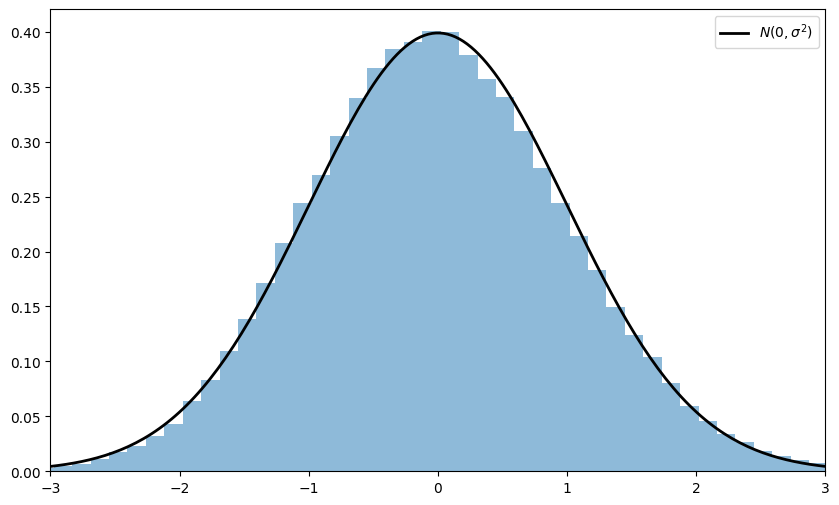

In [ ]:
# Set parameters
n = 250                  # Choice of n
k = 100000               # Number of draws of Y_n
distribution = expon(2)  # Exponential distribution, λ = 1/2
μ, s = distribution.mean(), distribution.std()

# Draw underlying RVs. Each row contains a draw of X_1,..,X_n
data = distribution.rvs((k, n))
# Compute mean of each row, producing k draws of \bar X_n
sample_means = data.mean(axis=1)
# Generate observations of Y_n
Y = np.sqrt(n) * (sample_means - μ)

# Plot
fig, ax = plt.subplots(figsize=(10, 6))
xmin, xmax = -3 * s, 3 * s
ax.set_xlim(xmin, xmax)
ax.hist(Y, bins=60, alpha=0.5, density=True)
xgrid = np.linspace(xmin, xmax, 200)
ax.plot(xgrid, norm.pdf(xgrid, scale=s), 'k-', lw=2, label='$N(0, \sigma^2)$')
ax.legend()

plt.show()

Notice the absence of for loops — every operation is vectorized, meaning that the major calculations are all shifted to highly optimized C code.

The fit to the normal density is already tight and can be further improved by increasing `n`.

You can also experiment with other specifications of $ F $.

### Simulation 2

Our next simulation is somewhat like the first, except that we aim to track the distribution of $ Y_n := \sqrt{n} ( \bar X_n - \mu ) $ as $ n $ increases.

In the simulation, we’ll be working with random variables having $ \mu = 0 $.

Thus, when $ n=1 $, we have $ Y_1 = X_1 $, so the first distribution is just
the distribution of the underlying random variable.

For $ n=2 $, the distribution of $ Y_2 $ is that of $ (X_1 + X_2) / \sqrt{2} $, and so on.

What we expect is that, regardless of the distribution of the underlying
random variable, the distribution of $ Y_n $ will smooth out into a bell-shaped curve.

The next figure shows this process for $ X_i \sim f $, where $ f $ was
specified as the convex combination of three different beta densities.

(Taking a convex combination is an easy way to produce an irregular shape for $ f $.)

In the figure, the closest density is that of $ Y_1 $, while the furthest is that of
$ Y_5 $

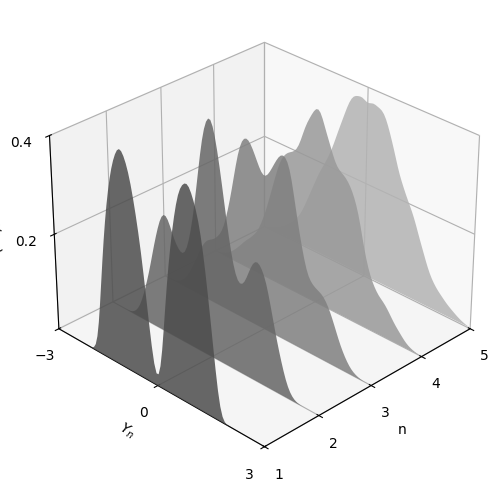

In [ ]:
beta_dist = beta(2, 2)

def gen_x_draws(k):
    """
    Returns a flat array containing k independent draws from the
    distribution of X, the underlying random variable.  This distribution
    is itself a convex combination of three beta distributions.
    """
    bdraws = beta_dist.rvs((3, k))
    # Transform rows, so each represents a different distribution
    bdraws[0, :] -= 0.5
    bdraws[1, :] += 0.6
    bdraws[2, :] -= 1.1
    # Set X[i] = bdraws[j, i], where j is a random draw from {0, 1, 2}
    js = np.random.randint(0, 2, size=k)
    X = bdraws[js, np.arange(k)]
    # Rescale, so that the random variable is zero mean
    m, sigma = X.mean(), X.std()
    return (X - m) / sigma

nmax = 5
reps = 100000
ns = list(range(1, nmax + 1))

# Form a matrix Z such that each column is reps independent draws of X
Z = np.empty((reps, nmax))
for i in range(nmax):
    Z[:, i] = gen_x_draws(reps)
# Take cumulative sum across columns
S = Z.cumsum(axis=1)
# Multiply j-th column by sqrt j
Y = (1 / np.sqrt(ns)) * S

# Plot
ax = plt.figure(figsize = (10, 6)).add_subplot(projection='3d')

a, b = -3, 3
gs = 100
xs = np.linspace(a, b, gs)

# Build verts
greys = np.linspace(0.3, 0.7, nmax)
verts = []
for n in ns:
    density = gaussian_kde(Y[:, n-1])
    ys = density(xs)
    verts.append(list(zip(xs, ys)))

poly = PolyCollection(verts, facecolors=[str(g) for g in greys])
poly.set_alpha(0.85)
ax.add_collection3d(poly, zs=ns, zdir='x')

ax.set(xlim3d=(1, nmax), xticks=(ns), ylabel='$Y_n$', zlabel='$p(y_n)$',
       xlabel=("n"), yticks=((-3, 0, 3)), ylim3d=(a, b),
       zlim3d=(0, 0.4), zticks=((0.2, 0.4)))
ax.invert_xaxis()
# Rotates the plot 30 deg on z axis and 45 deg on x axis
ax.view_init(30, 45)
plt.show()

As expected, the distribution smooths out into a bell curve as $ n $
increases.

We leave you to investigate its contents if you wish to know more.

If you run the file from the ordinary IPython shell, the figure should pop up in a
window that you can rotate with your mouse, giving different views on the
density sequence.


<a id='multivariate-clt'></a>

### The Multivariate Case


<a id='index-10'></a>
The law of large numbers and central limit theorem work just as nicely in multidimensional settings.

To state the results, let’s recall some elementary facts about random vectors.

A random vector $ \mathbf X $ is just a sequence of $ k $ random variables $ (X_1, \ldots, X_k) $.

Each realization of $ \mathbf X $ is an element of $ \mathbb R^k $.

A collection of random vectors $ \mathbf X_1, \ldots, \mathbf X_n $ is called independent if, given any $ n $ vectors $ \mathbf x_1, \ldots, \mathbf x_n $ in $ \mathbb R^k $, we have

$$
\mathbb P\{\mathbf X_1 \leq \mathbf x_1,\ldots, \mathbf X_n \leq \mathbf x_n \}
= \mathbb P\{\mathbf X_1 \leq \mathbf x_1 \}
\times \cdots \times \mathbb P\{ \mathbf X_n \leq \mathbf x_n \}
$$

(The vector inequality $ \mathbf X \leq \mathbf x $ means that $ X_j \leq x_j $ for $ j = 1,\ldots,k $)

Let $ \mu_j := \mathbb E [X_j] $ for all $ j =1,\ldots,k $.

The expectation $ \mathbb E [\mathbf X] $ of $ \mathbf X $ is defined to be the vector of expectations:

$$
\mathbb E [\mathbf X] :=
\left(
\begin{array}{c}
    \mathbb E [X_1] \\
    \mathbb E [X_2] \\
    \vdots \\
    \mathbb E [X_k]
\end{array}
\right) =
\left(
\begin{array}{c}
    \mu_1 \\
    \mu_2\\
    \vdots \\
    \mu_k
\end{array}
\right) =: \boldsymbol \mu
$$

The *variance-covariance matrix* of random vector $ \mathbf X $ is defined as

$$
\mathop{\mathrm{Var}}[\mathbf X]
:= \mathbb E
[ (\mathbf X - \boldsymbol \mu) (\mathbf X - \boldsymbol \mu)']
$$

Expanding this out, we get

$$
\mathop{\mathrm{Var}}[\mathbf X] =
\left(
\begin{array}{ccc}
    \mathbb E [(X_1 - \mu_1)(X_1 - \mu_1)]
        & \cdots & \mathbb E [(X_1 - \mu_1)(X_k - \mu_k)] \\
    \mathbb E [(X_2 - \mu_2)(X_1 - \mu_1)]
        & \cdots & \mathbb E [(X_2 - \mu_2)(X_k - \mu_k)] \\
    \vdots & \vdots & \vdots \\
    \mathbb E [(X_k - \mu_k)(X_1 - \mu_1)]
        & \cdots & \mathbb E [(X_k - \mu_k)(X_k - \mu_k)] \\
\end{array}
\right)
$$

The $ j,k $-th term is the scalar covariance between $ X_j $ and
$ X_k $.

With this notation, we can proceed to the multivariate LLN and CLT.

Let $ \mathbf X_1, \ldots, \mathbf X_n $ be a sequence of independent and
identically distributed random vectors, each one taking values in
$ \mathbb R^k $.

Let $ \boldsymbol \mu $ be the vector $ \mathbb E [\mathbf X_i] $, and let $ \Sigma $
be the variance-covariance matrix of $ \mathbf X_i $.

Interpreting vector addition and scalar multiplication in the usual way (i.e., pointwise), let

$$
\bar{\mathbf X}_n := \frac{1}{n} \sum_{i=1}^n \mathbf X_i
$$

In this setting, the LLN tells us that


<a id='equation-lln-asmv'></a>
$$
\mathbb P \left\{ \bar{\mathbf X}_n \to \boldsymbol \mu \text{ as } n \to \infty \right\} = 1 \tag{9.6}
$$

Here $ \bar{\mathbf X}_n \to \boldsymbol \mu $ means that $ \| \bar{\mathbf X}_n - \boldsymbol \mu \| \to 0 $, where $ \| \cdot \| $ is the standard Euclidean norm.

The CLT tells us that, provided $ \Sigma $ is finite,


<a id='equation-lln-cltmv'></a>
$$
\sqrt{n} ( \bar{\mathbf X}_n - \boldsymbol \mu ) \stackrel { d } {\to} N(\mathbf 0, \Sigma)
\quad \text{as} \quad
n \to \infty \tag{9.7}
$$